I am comparing some of the greatest classical novels in the 19th century. The literature era bloomed in the 19th century following the industrial revolution. Many ideas and philosophies shared by many great people at that time. Here is a list of novels. 


In [1]:
# Import library
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['datasets\\AdventuresofHuckleberryFinn.txt',
 'datasets\\CrimeAndPunishment.txt',
 'datasets\\HeartOfDarkness.txt',
 'datasets\\NotesFromUnderground.txt',
 'datasets\\OliverTwist.txt',
 'datasets\\PrideAndPrejudice.txt',
 'datasets\\TaleOfTwoCities.txt',
 'datasets\\TheCountofMonteCristo.txt',
 'datasets\\WarAndPeace.txt',
 'datasets\\WutheringHeight.txt']

Input the text length

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []


for n in files:
    # Open each file
    f = open(n, encoding = 'utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...

    data = re.sub('[\W_]+',' ', f.read())
    # Store the texts and titles of the books in two separate lists
    # ... YOUR CODE FOR TASK 2 ...
    # ... YOUR CODE FOR TASK 2 ...
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)
    
[len(t) for t in txts]

[563762,
 1101737,
 221301,
 249216,
 867782,
 678096,
 741719,
 2513946,
 3110010,
 636006]

Stem the texts

In [3]:
#porter = PorterStemmer()
#lancaster=LancasterStemmer()

#txts_stem = [lancaster.stem(word) for word in txts]


Getting the stopwords. Stopwords are the words to remove from the files


In [4]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
print(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alloq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

Make the words lowercase and split the words in the folder


In [5]:
# Convert the text to lower case 
txts_lower_case = [word.lower() for word in txts]

# Transform the text into tokens 
txts_split = [word_lower.split() for word_lower in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in sw]for txt in txts_split]
texts[4][:20]

['project',
 'gutenberg',
 'ebook',
 'oliver',
 'twist',
 'charles',
 'dickens',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use']

Build a bag-of-words model

In [6]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
bows = [dictionary.doc2bow(text) for text in texts]
bows[4][:5]

[(1, 1), (2, 45), (3, 1), (4, 1), (5, 1)]

Compute distance between texts. Finding the correlation between each novels. Tf-Idf stands for term frequency–inverse document frequency. This is to measure the weight of the word in a document. There is a formula of calculating the Tf-Idf score of the words. Most high Tf-Idf scores are from the character names.


In [7]:
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd

#Find the Tfidf(term frequency-inverse document frequency) of the dictionary words. The model defines the importance of each word.
model = model = TfidfModel(bows)
# Compute the similarity matrix (pairwise distance between all texts).
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
# ... YOUR CODE FOR TASK 10 ...
sim_df

,AdventuresofHuckleberryFinn,CrimeAndPunishment,HeartOfDarkness,NotesFromUnderground,OliverTwist,PrideAndPrejudice,TaleOfTwoCities,TheCountofMonteCristo,WarAndPeace,WutheringHeight
AdventuresofHuckleberryFinn,1.000000,0.002145,0.014897,0.004917,0.005838,0.018543,0.005456,0.005496,0.008829,0.003269
CrimeAndPunishment,0.002145,1.000000,0.003580,0.019475,0.001990,0.001432,0.003123,0.003036,0.006089,0.001938
HeartOfDarkness,0.014897,0.003580,1.000000,0.007488,0.003619,0.001701,0.006185,0.005001,0.008821,0.004917
NotesFromUnderground,0.004917,0.019475,0.007488,1.000000,0.003565,0.003711,0.005930,0.006837,0.015611,0.004747
OliverTwist,0.005838,0.001990,0.003619,0.003565,1.000000,0.011558,0.005533,0.003154,0.003127,0.007357
PrideAndPrejudice,0.018543,0.001432,0.001701,0.003711,0.011558,0.999999,0.004249,0.002437,0.004666,0.020720
TaleOfTwoCities,0.005456,0.003123,0.006185,0.005930,0.005533,0.004249,1.000000,0.019664,0.006392,0.004367
TheCountofMonteCristo,0.005496,0.003036,0.005001,0.006837,0.003154,0.002437,0.019664,1.000002,0.016613,0.003103
WarAndPeace,0.008829,0.006089,0.008821,0.015611,0.003127,0.004666,0.006392,0.016613,0.999999,0.005022
WutheringHeight,0.003269,0.001938,0.004917,0.004747,0.007357,0.020720,0.004367,0.003103,0.005022,1.000001


Print all the word scores from each novel. Almost all of the high scoring Tf-Idf words are name characters.

In [8]:
# Convert the tf-idf model into a DataFrame
for i, title in enumerate(titles):
    df_tfidf = pd.DataFrame(model[bows][i], columns = ['id', 'score'])

# Name the columns of the DataFrame id and score
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf
# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])
    df_tfidf['title'] = title
# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf = df_tfidf.sort_values('score', ascending = False)
    
    print(df_tfidf)

        id     score          token                        title
2180  2863  0.750219            jim  AdventuresofHuckleberryFinn
4376  5706  0.186015            tom  AdventuresofHuckleberryFinn
2014  2651  0.180822           huck  AdventuresofHuckleberryFinn
3233  4284  0.158659           raft  AdventuresofHuckleberryFinn
1122  1456  0.157738            dey  AdventuresofHuckleberryFinn
1281  1664  0.151880           duke  AdventuresofHuckleberryFinn
1808  2399  0.142349           hain  AdventuresofHuckleberryFinn
2285  2983  0.126389         knowed  AdventuresofHuckleberryFinn
2754  3621  0.126306         nigger  AdventuresofHuckleberryFinn
1060  1364  0.122355            dat  AdventuresofHuckleberryFinn
2905  3830  0.119266            pap  AdventuresofHuckleberryFinn
1198  1560  0.115418        dollars  AdventuresofHuckleberryFinn
1336  1749  0.100715             en  AdventuresofHuckleberryFinn
1686  2243  0.098106            git  AdventuresofHuckleberryFinn
1798  2389  0.088487     

         id     score          token              title
4213  18614  0.502791      elizabeth  PrideAndPrejudice
4110  18511  0.473513          darcy  PrideAndPrejudice
3966  18367  0.365896         bennet  PrideAndPrejudice
3971  18372  0.346639        bingley  PrideAndPrejudice
475    2843  0.233580           jane  PrideAndPrejudice
4991  19392  0.219764        wickham  PrideAndPrejudice
4493  18894  0.193710          lydia  PrideAndPrejudice
174    1063  0.142523        collins  PrideAndPrejudice
573    3513  0.116966            mrs  PrideAndPrejudice
4483  18884  0.109882          lizzy  PrideAndPrejudice
4323  18724  0.109882       gardiner  PrideAndPrejudice
4485  18886  0.099687      longbourn  PrideAndPrejudice
4541  18942  0.082695    netherfield  PrideAndPrejudice
4489  18890  0.079296          lucas  PrideAndPrejudice
4501  18902  0.064570        meryton  PrideAndPrejudice
4606  19007  0.060039      pemberley  PrideAndPrejudice
4003  18404  0.056799      catherine  PrideAndPr

          id     score        token        title
10999  25100  0.512353       pierre  WarAndPeace
14091  29292  0.452951      natásha  WarAndPeace
8064   15081  0.298329       andrew  WarAndPeace
14873  30074  0.289769       rostóv  WarAndPeace
13608  28809  0.197536      kutúzov  WarAndPeace
15400  30601  0.167289        sónya  WarAndPeace
12420  27621  0.161315      denísov  WarAndPeace
5511   10570  0.159718       prince  WarAndPeace
5090    9900  0.140971       moscow  WarAndPeace
5152    9994  0.123593     nicholas  WarAndPeace
12621  27822  0.122853     dólokhov  WarAndPeace
11846  27047  0.109410        borís  WarAndPeace
14622  29823  0.099702        pétya  WarAndPeace
751     1744  0.093764      emperor  WarAndPeace
15800  31001  0.090740       vasíli  WarAndPeace
5128    9952  0.085889     napoleon  WarAndPeace
11521  26722  0.082898      anatole  WarAndPeace
5512   10571  0.075883     princess  WarAndPeace
1378    3323  0.075089         mary  WarAndPeace
3533    7598  0.0725

Books similar to Pride And Prejudice

Text(0.5,1,'Similarity Value for Adventure Of Huckleberry Finn')

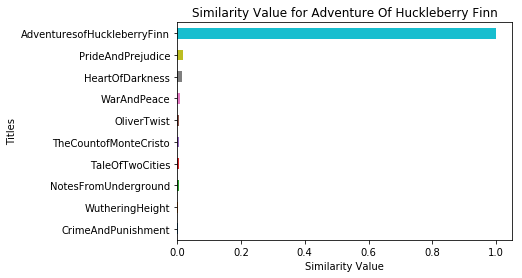

In [12]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['AdventuresofHuckleberryFinn'] 

# Sort by ascending scores
v_sorted = v.sort_values(ascending = True)

# Plot this data has a horizontal bar plot
# ... YOUR CODE FOR TASK 11 ...
v_sorted.plot.barh(x = 'lab', y = 'val', rot = 0).plot
# Modify the axes labels and plot title for a better readability
# ... YOUR CODE FOR TASK 11 ...
plt.xlabel('Similarity Value')
plt.ylabel('Titles')
plt.title('Similarity Value for Adventure Of Huckleberry Finn')

Books with similar content

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25]],
 'dcoord': [[0.0, 1.3932542334904316, 1.3932542334904316, 0.0],
  [0.0, 1.3850065044326003, 1.3850065044326003, 0.0],
  [0.0, 1.4061867016920535, 1.4061867016920535, 1.3850065044326003],
  [1.3932542334904316,
   1.420424998043936,
   1.420424998043936,
   1.4061867016920535],
  [0.0, 1.3867262557039437, 1.3867262557039437, 0.0],
  [0.0, 1.3864480918822828, 1.3864480918822828, 0.0],
  [0.0, 1.4018859153051166, 1.4018859153051166, 1.3864480918822828],
  [1.3867262557039437,
   1.423922031326927,
   1.423922031326927,
   1.4018859153051166],
  [1.420424998043936,
   1.4381173132244227,
   1.4381173132244227,
   1.423922031326927]],
 'ivl': ['AdventuresofHuckleberryFinn',
  'HeartOfDarkness',
  'OliverTwist',
  'PrideAndPrejudic

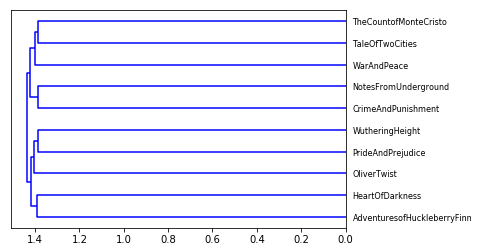

In [10]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
# ... YOUR CODE FOR TASK 12 ...
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")

No novels have the same resemblance of the other novels which means each books was written with careful and meaningful vocabularies and not shared with other novels. However, the Tf-Idf scores are high in character names therefore they need to be further measured. 

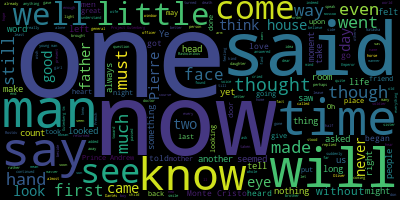

In [11]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
long_string = ' '.join(txts)

wordcloud.generate(long_string)
wordcloud.to_image()

The word 'one' has the most count which is the same for Jane Austen and Charles Dickens novels.